Notebook run using:
    
Python version: 3.13.5

CUDA runtime: 12.9

GPU: NVIDIA L4

# Model Building

In this notebook, we will begin building different classification models to predict crash severity

### Load Dataframe

In [2]:
import pandas as pd
import kagglehub

# ✅ Download the dataset if not stored locally
path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")

# path ="/home/jacksonwahl/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13"
# ✅ Load the CSV into pandas
df_orig = pd.read_csv(f"{path}/US_Accidents_March23.csv")
print("pandas df loaded")

ImportError: Unable to import required dependencies:
numpy: Error importing numpy: you should not try to import numpy from
        its source directory; please exit the numpy source tree, and relaunch
        your python interpreter from there.

In [2]:
# Make copy of original dataset for working and easy re-initialization
df = df_orig.copy()
print("First 5 records:")
print("shape:", df_orig.shape)

First 5 records:
shape: (7728394, 46)


## Data Preprocessing

See "Model Building" PDF report for rationale on all removed, transformed and imputed data

In [3]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

### Remove columns

In [5]:
df = df.drop(columns=["ID", "Source", "Start_Time", "End_Time", "Start_Lat","Start_Lng","End_Lat", "End_Lng", "Description", "Street", "City", "County","State","Zipcode","Country","Timezone","Airport_Code","Weather_Timestamp","Wind_Direction"])

### Transform columns

#### Weather_Condition

In [58]:
from collections import Counter

# Drop N/A vals
weather_vals = df["Weather_Condition"].dropna().unique()

# Split each weather description (string) into words and flatten the list
all_words = [word for text in weather_vals for word in text.split()]
word_counts = Counter(all_words)

# Visualize the most popular words
print(word_counts)

Counter({'/': 50, 'Windy': 45, 'Light': 31, 'Snow': 31, 'Rain': 26, 'Heavy': 23, 'and': 18, 'Thunder': 14, 'Sleet': 13, 'Fog': 11, 'Freezing': 10, 'Drizzle': 9, 'Blowing': 8, 'Dust': 8, 'Shower': 8, 'Thunderstorms': 7, 'Cloudy': 6, 'Showers': 6, 'Sand': 6, 'Hail': 6, 'with': 4, 'T-Storm': 4, 'Wintry': 4, 'Mix': 4, 'Haze': 3, 'Smoke': 3, 'Drifting': 3, 'Ice': 3, 'Pellets': 3, 'Mostly': 2, 'Partly': 2, 'Shallow': 2, 'Mist': 2, 'Patches': 2, 'of': 2, 'Fair': 2, 'Widespread': 2, 'in': 2, 'the': 2, 'Vicinity': 2, 'Thunderstorm': 2, 'Squalls': 2, 'Grains': 2, 'Small': 2, 'Whirlwinds': 2, 'Whirls': 2, 'Nearby': 2, 'Partial': 2, 'Overcast': 1, 'Scattered': 1, 'Clouds': 1, 'Clear': 1, 'Volcanic': 1, 'Ash': 1, 'Funnel': 1, 'Cloud': 1, 'Low': 1, 'N/A': 1, 'Precipitation': 1, 'Tornado': 1, 'Duststorm': 1})


## OLD - one hot encode a bunch of cols

In [59]:
# df.dropna(subset=["Weather_Condition"], inplace=True)

# # Ignore 'Windy' because it is captured in the 'wind speed' column
# # Ignore 'Rain' because it is captured in the 'precipitation' column
# # Ignore 'Freezing' because it is captured by 'temperature' column


# # Encode 'Light' and 'Heavy' because they can indicate severity of weather conditions
# # Binary column: 1 if 'hello' exists in 'text', 0 otherwise
# df["Light_Weather"] = df["Weather_Condition"].str.contains("Light").astype(int)
# df["Heavy_Weather"] = df["Weather_Condition"].str.contains("Heavy").astype(int)

# # Encode 'Thunder', 'T-Storm' and 'Thunderstorms' 'Thunderstorm' to be 'Thundering'
# df["Thundering_Weather"] = df["Weather_Condition"].str.contains("|".join(["Thunder","T-Storm","Thunderstorms","Thunderstorm"])).astype(int)

# # Encode 'Fog' because its popular (even though it might be correlated with visibility)
# df["Fog_Weather"] = df["Weather_Condition"].str.contains("Fog").astype(int)

# # Encode 'Clouds', 'Cloudy', 'Cloud', and 'Overcast' to 'Cloudy'
# df["Cloudy_Weather"] = df["Weather_Condition"].str.contains("|".join(["Clouds","Cloudy","Cloud","Overcast"])).astype(int)

# # Encode 'Clear' because it seems distinct
# df["Clear_Weather"] = df["Weather_Condition"].str.contains("Clear").astype(int)

# # Now, drop weather condition since it is no longer needed
# df = df.drop(columns=["Weather_Condition"])

## NEW - drop weather condition

In [6]:
# Now, drop weather condition since it is no longer needed
df = df.drop(columns=["Weather_Condition"])

In [7]:
df.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,0.01,36.9,NaN,91.0,29.68,10.0,NaN,0.02,False,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,0.01,37.9,NaN,100.0,29.65,10.0,NaN,0.00,False,...,False,False,False,False,False,False,Night,Night,Night,Day
2,2,0.01,36.0,33.3,100.0,29.67,10.0,3.5,NaN,False,...,False,False,False,False,True,False,Night,Night,Day,Day
3,3,0.01,35.1,31.0,96.0,29.64,9.0,4.6,NaN,False,...,False,False,False,False,False,False,Night,Day,Day,Day
4,2,0.01,36.0,33.3,89.0,29.65,6.0,3.5,NaN,False,...,False,False,False,False,True,False,Day,Day,Day,Day


#### Binary encoding Sunset and Twilight columns 

## OLD - one hot encode all

In [11]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df["Sunrise_Sunset"] = le.fit_transform(df["Sunrise_Sunset"])
# df["Civil_Twilight"] = le.fit_transform(df["Civil_Twilight"])
# df["Nautical_Twilight"] = le.fit_transform(df["Nautical_Twilight"])
# df["Astronomical_Twilight"] = le.fit_transform(df["Astronomical_Twilight"])

## NEW - keep sunrise sunset and drop the rest 3

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Sunrise_Sunset"] = le.fit_transform(df["Sunrise_Sunset"])

df = df.drop(columns=["Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight"])

In [22]:
df.head()

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,3,0.01,36.9,91.0,29.68,10.0,7.690174,0.020000,False,False,...,False,False,False,False,False,False,False,False,False,1
1,2,0.01,37.9,100.0,29.65,10.0,7.690174,0.000000,False,False,...,False,False,False,False,False,False,False,False,False,1
2,2,0.01,36.0,100.0,29.67,10.0,3.500000,0.007992,False,False,...,False,False,False,False,False,False,False,True,False,1
3,3,0.01,35.1,96.0,29.64,9.0,4.600000,0.007992,False,False,...,False,False,False,False,False,False,False,False,False,1
4,2,0.01,36.0,89.0,29.65,6.0,3.500000,0.007992,False,False,...,False,False,False,False,False,False,False,True,False,0


### Drop rows with NA values

In [23]:
df.dropna(subset=["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)"], inplace=True)

### Impute columns

In [12]:
# Fill NA columns with zero
df["Wind_Speed(mph)"] = df["Wind_Speed(mph)"].fillna(df["Wind_Speed(mph)"].mean())
df["Precipitation(in)"] = df["Precipitation(in)"].fillna(df["Precipitation(in)"].mean())

# Fill NA wind chill column with temperature value for that sample
df["Wind_Chill(F)"] = df["Wind_Chill(F)"].fillna(df["Temperature(F)"])


In [24]:
# Confirm no more missing values
na_counts = df.isna().sum()
print(na_counts)

Severity             0
Distance(mi)         0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
dtype: int64


In [25]:
df.shape

(7507723, 22)

### Outlier cleaning

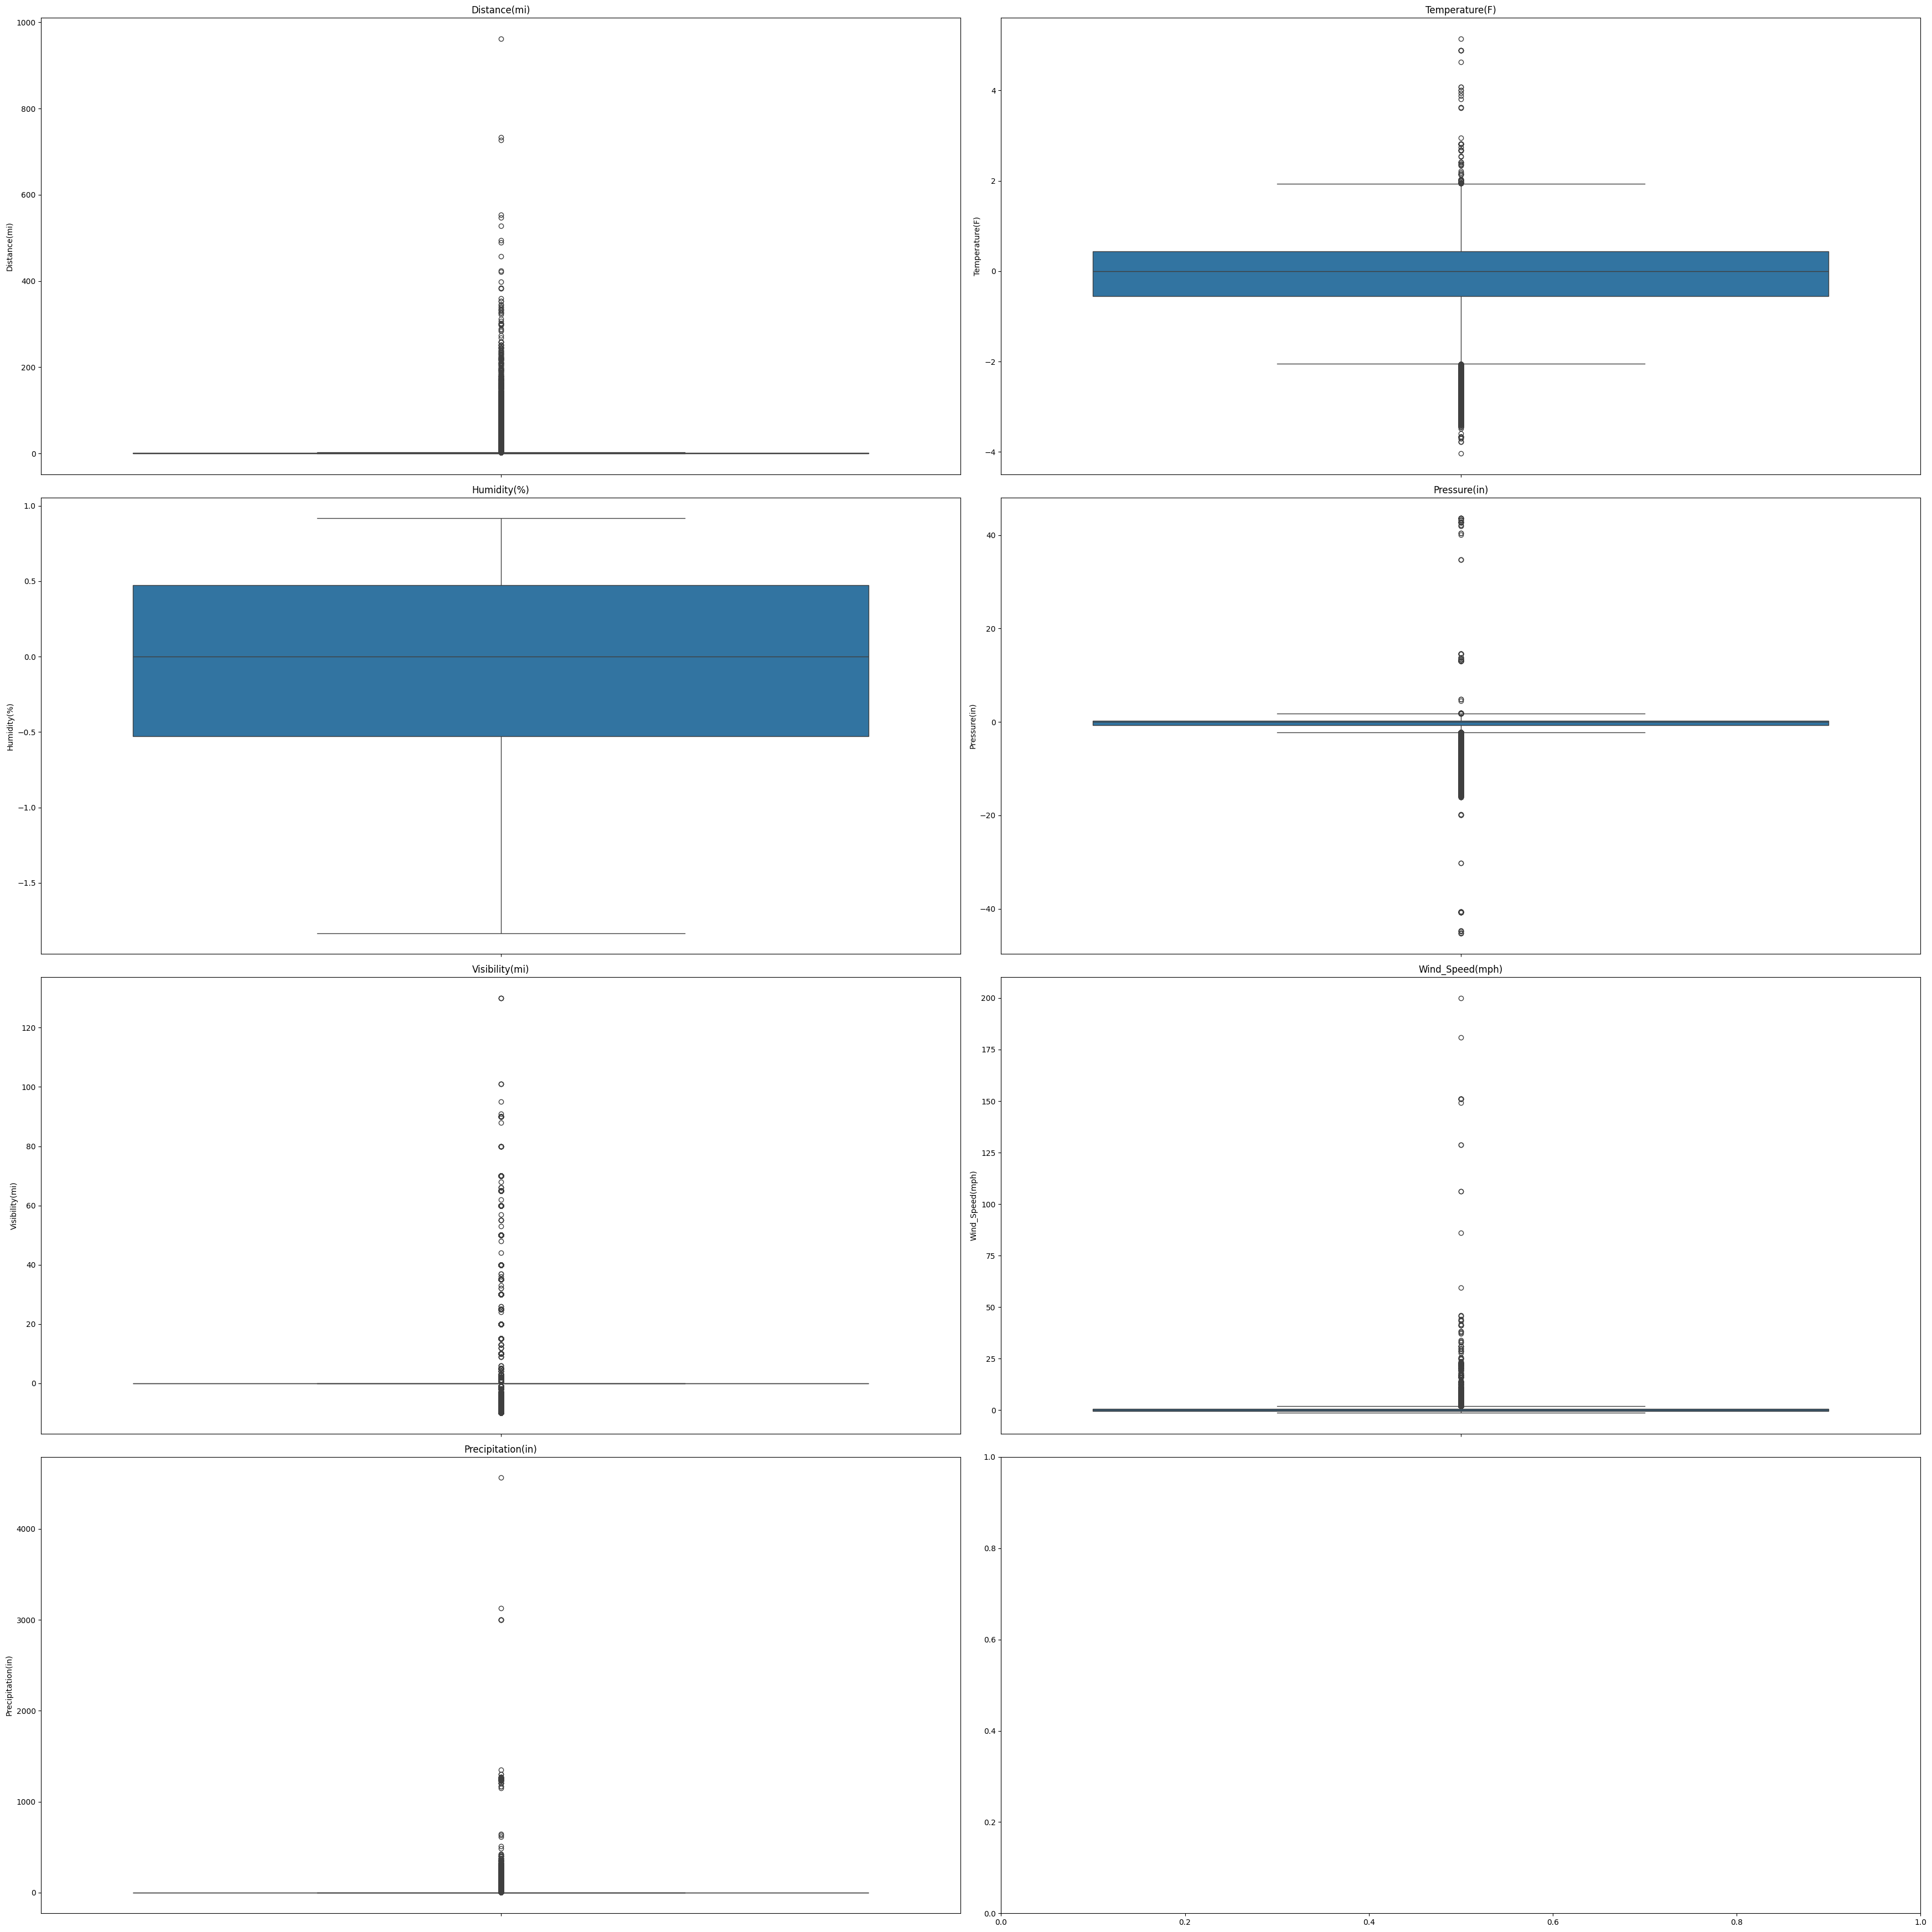

,Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,3,-0.039216,-1.003704,0.666667,-0.272727,0.0,0.127810,2.502608,False,False,...,False,False,False,False,False,False,False,False,False,1
1,2,-0.039216,-0.966667,0.916667,-0.318182,0.0,0.127810,0.000000,False,False,...,False,False,False,False,False,False,False,False,False,1
2,2,-0.039216,-1.037037,0.916667,-0.287879,0.0,-0.648148,1.000000,False,False,...,False,False,False,False,False,False,False,True,False,1
3,3,-0.039216,-1.070370,0.805556,-0.333333,-1.0,-0.444444,1.000000,False,False,...,False,False,False,False,False,False,False,False,False,1
4,2,-0.039216,-1.037037,0.611111,-0.318182,-4.0,-0.648148,1.000000,False,False,...,False,False,False,False,False,False,False,True,False,0


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

def scale_data(df):
    cols_to_scale=['Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)','Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
    scaler = RobustScaler()
    # Fit and transform those columns
    df_scaled = df.copy()
    df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
    return df_scaled

## Visualize
## 
cols=['Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)','Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
fig, axes = plt.subplots(4, 2, figsize=(5*len(cols), 5*len(cols)))
axes = axes.flatten()
df_scaled = scale_data(df)
for i, col in enumerate(cols):
    sns.boxplot(y=df_scaled[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

df_scaled.head()


### Outlier cleaning - Temperature(F)

In [28]:
pd.set_option('display.max_columns', None)
# Update multiple columns at once

# 10 rows in san bernardino for a single day (2021-01-08) have this value
df.loc[df['Wind_Chill(F)'] == 120.0, ['Temperature(F)']] = [50]

# 10 rows in brooklyn for a single day (2017-12-12) have this value
df.loc[df['Temperature(F)'] == -77.8, ['Temperature(F)']] = [50]

# 10 rows in denver for a single day (2020-04-03) have this value
df.loc[df['Wind_Chill(F)'] == -89.0, ['Temperature(F)']] = [20]

# 10 rows in jackson, GA for a single day (2022-12-24) have this value
df.loc[df['Wind_Chill(F)'] == 140.0, ['Temperature(F)']] = [22]

# 5 rows in tuscaloosa, AL for a single day (8-12-2021) have this value
df.loc[df['Temperature(F)'] == 196.0, ['Temperature(F)']] = [84]

# 3 rows in san bernardino, CA for a single day (2023-02-22) have this value
df.loc[df['Temperature(F)'] == 207.0, ['Temperature(F)']] = [48]

# 1 rows in san arlington, TX for a single day (2020-07-17) have this value
df.loc[df['Temperature(F)'] == 203.0, ['Temperature(F)']] = [95]

# Clip the rest of the values between a reasonable range
df['Temperature(F)'] = df['Temperature(F)'].clip(lower=0, upper=110)

# Clip the rest of the values between a reasonable range
df['Wind_Chill(F)'] = df['Wind_Chill(F)'].clip(lower=0, upper=110)

KeyError: 'Wind_Chill(F)'

### Outlier cleaning - Pressure

In [29]:
# Clip the rest of the values between a reasonable range
df['Pressure(in)'] = df['Pressure(in)'].clip(lower=26, upper=32)

### Outlier cleaning - Wind speed

In [30]:
# set impossible wind speed recordings to column mean, since probably a completely bad reading
df.loc[df['Wind_Speed(mph)'] > 150, 'Wind_Speed(mph)'] = df['Wind_Speed(mph)'].mean()

## VIF

In [31]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppose X is your feature DataFrame (without target variable)
# Example:
# X = df[['feature1', 'feature2', 'feature3', 'feature4']]
# Drop target column
X = df.drop(columns=["Severity"])

X = X.select_dtypes(include=['float64', 'int64'])



# Add a constant for intercept
X_const = X.copy()
X_const['intercept'] = 1

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

             Feature          VIF
0       Distance(mi)     1.011191
1     Temperature(F)     1.234675
2        Humidity(%)     1.400800
3       Pressure(in)     1.054534
4     Visibility(mi)     1.217313
5    Wind_Speed(mph)     1.057607
6  Precipitation(in)     1.017643
7     Sunrise_Sunset     1.170178
8          intercept  1270.444711


In [32]:
# Remove columns that are very multi-colinear
df = df.drop(columns=["Wind_Chill(F)"])

KeyError: "['Wind_Chill(F)'] not found in axis"

## PCA

95% of explained variance using 19 principle components


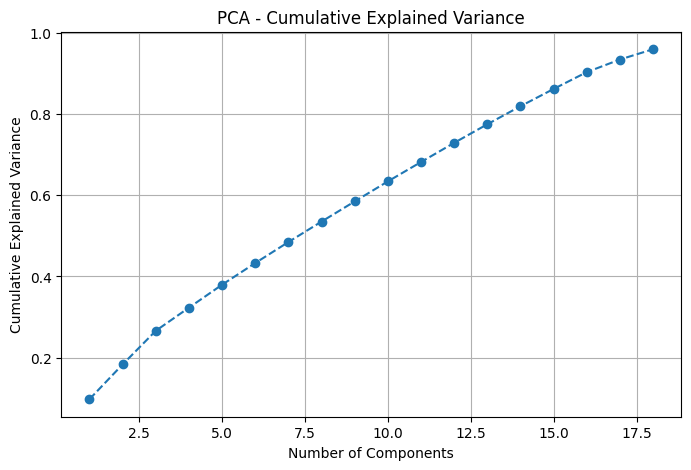

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Drop target column
X = df.drop(columns=["Severity"])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to n components (e.g., 2 for visualization)
pca = PCA(n_components=.95)
X_pca = pca.fit_transform(X_scaled)

cumulative_var = pca.explained_variance_ratio_.cumsum()
print("95% of explained variance using", len(cumulative_var)+1, "principle components")

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

## NEW - lets take only the top 95% variance principle components

In [35]:
# Initialize PCA, specifying the number of components you want to keep
    # You can also specify a 'n_components' as a float (e.g., 0.95) to retain
    # components that explain a certain percentage of variance.
pca = PCA(n_components=0.95) # Example: keeping 5 principal components

    # Fit PCA to your scaled data and transform it
principal_components = pca.fit_transform(X_scaled)
# Convert the principal components to a DataFrame for easier handling
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC_{i+1}' for i in range(principal_components.shape[1])])
pca_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18
0,1.680566,0.692067,-0.314480,-0.655238,0.260455,-0.114123,-0.054057,-0.110297,-0.062856,-0.115730,-0.054610,0.433875,0.287177,-0.563438,1.037631,-0.263779,-0.125819,0.448480
1,1.809636,0.792681,-0.374331,-0.745688,0.315741,-0.122037,-0.081477,-0.101020,-0.060151,-0.109388,-0.087381,0.526660,0.069466,-0.509144,0.924549,-0.246435,-0.049606,0.770144
2,1.070098,1.725791,-1.306924,-0.955050,0.524826,-0.945064,-0.955595,0.019983,0.032091,-0.389132,-0.132674,0.223725,0.538070,0.353485,0.675174,0.053700,-0.404236,0.396783
3,2.033459,0.941672,-0.453816,-0.822537,0.397708,-0.157892,-0.049888,-0.167923,-0.087429,-0.151423,-0.016088,0.231621,0.174725,-0.450097,0.560089,-0.160987,-0.190150,0.326444
4,0.652132,1.429506,-1.169937,0.563030,0.108412,-0.980437,-0.854446,-0.120812,-0.072286,-0.433389,-0.120814,0.253465,-0.289085,0.560745,-0.836569,0.208068,-1.197815,-0.338682


## Model training

### Prepare the data

In [42]:
from sklearn.model_selection import train_test_split


# Create our target and feature cols split
y = df["Severity"]

## NEW - use PCA_DF as X input
X = pca_df


# We'll do an 80/20 train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### OPTIONAL: Perform SMOTE synthetic sampling to balance class distribution in train set

In [10]:
###
#### SMOTE synthetic sampling to balance class distribution
###
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler


print("Performing SMOTE")
# Find majority class count
majority_count = y_train.value_counts().max()

# # Define desired counts using percentages
# sampling_strategy = {
#     1: int(.5 * majority_count),
#     4: int(.5 * majority_count)
# }
# smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


# rus = RandomUnderSampler(random_state=42)
# X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

print(y_train.value_counts())
percent = y_train.value_counts(normalize=True) * 100
print("\nPercentage of total:\n", percent)

print(y_train_res.value_counts())
percent = y_train_res.value_counts(normalize=True) * 100
print("\nPercentage of total:\n", percent)

# IF USING SMOTE synthetic sampling, set X_train and y_train to be SMOTE results
X_train = X_train_res
y_train = y_train_res
    

Performing SMOTE
Severity
2    4926458
3    1038812
4     163588
1      53857
Name: count, dtype: int64

Percentage of total:
 Severity
2    79.681143
3    16.801874
4     2.645893
1     0.871090
Name: proportion, dtype: float64


NameError: name 'y_train_res' is not defined

### Random forest classifier

#### Using NVIDIA L4 GPU

In [43]:
# if we should train the rf model
should_train_rf = True

In [2]:
import cudf
import itertools
from tqdm import tqdm
from cuml.ensemble import RandomForestClassifier as cuRF
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


# Define hyperparameter grid for search
# param_grid = {
#     "n_estimators": [50, 100, 200],
#     "max_depth": [10, 50],
#     "max_features": [0.5, 0.8, 1.0]
# }

### USE BEST PARAMS: n_estimators: 50 ; max_depth: 50 ; max_features: 0.5
param_grid = {
    "n_estimators": [50],
    "max_depth": [50],
    "max_features": [0.5]
}

# Generate all combinations
param_combinations = list(itertools.product(
    param_grid["n_estimators"],
    param_grid["max_depth"],
    param_grid["max_features"]
))

best_rf = None
def train_rf():
    # Create and train GPU Random Forest
    print("Training Random forest classifier on NVIDIA GPU")
    # Define the model
    rf_gpu = cuRF()
    
    # Convert pandas to cuDF
    X_train_gpu = cudf.DataFrame.from_pandas(X_train)
    y_train_gpu = cudf.Series(y_train)
    X_test_gpu = cudf.DataFrame.from_pandas(X_test)
    y_test_gpu = cudf.Series(y_test)
    
    best_acc = 0
    best_params = None
    best_rf= None
    for n_estimators, max_depth, max_features in tqdm(param_combinations, desc="GPU Grid Search"):
        rf = cuRF(
            n_estimators=n_estimators,
            max_depth=max_depth,
            max_features=max_features,
            random_state=42
        )
        rf.fit(X_train_gpu, y_train_gpu)

        y_train_pred_gpu = rf.predict(X_train_gpu)
        y_pred_gpu = rf.predict(X_test_gpu)

        train_acc = accuracy_score(y_train_gpu.to_pandas(), y_train_pred_gpu.to_pandas())
        test_acc = accuracy_score(y_test_gpu.to_pandas(), y_pred_gpu.to_pandas())

        # Summarize this hyperparam performance
        print("n_estimators:", n_estimators, "; max_depth:", max_depth, "; max_features:", max_features, "; Training Accuracy:", train_acc, "; Test Accuracy:", test_acc)

        # Convert to CPU for sklearn metrics
        if test_acc > best_acc:
            best_acc = test_acc
            best_params = {
                "n_estimators": n_estimators,
                "max_depth": max_depth,
                "max_features": max_features
            }
            best_rf = rf
        return best_rf, best_params
if should_train_rf:
    best_rf, best_params = train_rf()
    print("Best Params:", best_params)
    y_pred = best_rf.predict(X_test)
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("random forest ==>", f" MSE: {mse:.2f}", f"; MAE: {mae:.2f}", f"; MAPE: {mape * 100:.2f}%")

NameError: name 'should_train_rf' is not defined

### K Nearest Neighbors classifier

#### Using NVIDIA L4 GPU

In [28]:
should_train_knn = True

In [29]:
import cudf
from tqdm import tqdm
from cuml.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

neighbor_options = [100]

best_params = None
best_knn= None

def train_knn():
    print("Training k-nearest neighbors classifier on NVIDIA GPU")
    for n in tqdm(neighbor_options, desc="GPU Grid Search"):
        # GPU-accelerated KNN
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print("neighbors:", n, "; test_acc:", acc)
        best_acc = 0
        b_knn= None
        if acc > best_acc:
            b_knn = knn
            best_acc = acc
    return b_knn

if should_train_knn:
    best_knn = train_knn()
    print(best_knn)
    y_pred = best_knn.predict(X_test)
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("k nearest neighbors==>", f" MSE: {mse:.2f}", f"; MAE: {mae:.2f}", f"; MAPE: {mape * 100:.2f}%")

Training k-nearest neighbors classifier on NVIDIA GPU


GPU Grid Search:   0%|          | 0/1 [00:00<?, ?it/s]

k nearest neighbors==>  MSE: 0.28 ; MAE: 0.23 ; MAPE: 7.91%


### Logistic Regression

In [31]:
should_train_lr = True

In [32]:
import cudf
from cuml.linear_model import LogisticRegression
from cuml.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Convert pandas to cuDF
X_train_gpu = cudf.DataFrame.from_pandas(X_train)
y_train_gpu = cudf.Series(y_train)
X_test_gpu = cudf.DataFrame.from_pandas(X_test)
y_test_gpu = cudf.Series(y_test)

best_lr = None

def train_lr():
    
    # Train model (GPU)
    print("Training logistic regression on NVIDIA GPU")
    best_lr = LogisticRegression(max_iter=1000)
    best_lr.fit(X_train, y_train)
    # Predict
    y_pred = best_lr.predict(X_test)
    
    # Evaluate
    print("Accuracy:", accuracy_score(y_test.to_numpy(), y_pred.to_numpy()))
    return best_lr

if should_train_lr:
    best_lr = train_lr()
    y_pred = best_lr.predict(X_test)
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("logistic regression ==>", f" MSE: {mse:.2f}", f"; MAE: {mae:.2f}", f"; MAPE: {mape * 100:.2f}%")


Training logistic regression on NVIDIA GPU
[2025-10-28 17:55:52.900] [CUML] [warning] L-BFGS line search failed (code 3); stopping at the last valid step
Accuracy: 0.7970158895837769
logistic regression ==>  MSE: 0.28 ; MAE: 0.23 ; MAPE: 7.80%


## Extreme Gradient (XG) Boost Classifier

In [28]:
should_train_xgb = True

In [ ]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# y_train = y_train - 1
# y_test = y_test - 1

def train_xgb():
    model = xgb.XGBClassifier(
        device='cuda',
        max_depth=25,
        learning_rate=1
    )
    model.fit(X_train, y_train)
    return model

if should_train_xgb:
    best_xgb = train_xgb()
    y_pred = best_xgb.predict(X_test)
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print("extreme gradient boost classifier ==>", f" MSE: {mse:.2f}", f"; MAE: {mae:.2f}", f"; MAPE: {mape * 100:.2f}%")
    report = classification_report(y_test, y_pred)
    print(report)

## Light Gradient Boosting Machine (LightGBM) Classifier

In [30]:
should_train_light_gbm = True

In [31]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# --- Set parameters for GPU training ---
params = {
    'objective': 'multiclass',
    'num_class': 4,         # number of target classes
    'metric': 'multi_error',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': -1            # enable CUDA GPU acceleration
}

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# --- Train the model ---
light_gbm_model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    num_boost_round=100
)

y_pred = light_gbm_model.predict(X_test).argmax(axis=1)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("light gradient boosted machine classifier ==>", f" MSE: {mse:.2f}", f"; MAE: {mae:.2f}", f"; MAPE: {mape * 100:.2f}%")
report = classification_report(y_test, y_pred)
print(report)

light gradient boosted machine classifier ==>  MSE: 0.27 ; MAE: 0.22 ; MAPE: 3928619385396304.50%
              precision    recall  f1-score   support

           0       0.49      0.03      0.05     13224
           1       0.81      0.98      0.89   1194481
           2       0.56      0.12      0.20    251719
           3       0.47      0.01      0.03     38979

    accuracy                           0.80   1498403
   macro avg       0.58      0.29      0.29   1498403
weighted avg       0.76      0.80      0.74   1498403



## Decision Tree

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Create model
dt_model = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=3,       
    random_state=42
)

# Fit model
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("decision tree ==>", f" MSE: {mse:.2f}", f"; MAE: {mae:.2f}", f"; MAPE: {mape * 100:.2f}%")

decision tree ==>  MSE: 0.28 ; MAE: 0.23 ; MAPE: 7.78%


In [24]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     13224
           2       0.80      1.00      0.89   1194481
           3       0.00      0.00      0.00    251719
           4       0.00      0.00      0.00     38979

    accuracy                           0.80   1498403
   macro avg       0.20      0.25      0.22   1498403
weighted avg       0.64      0.80      0.71   1498403



/home/jacksonwahl/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/jacksonwahl/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/jacksonwahl/.local/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

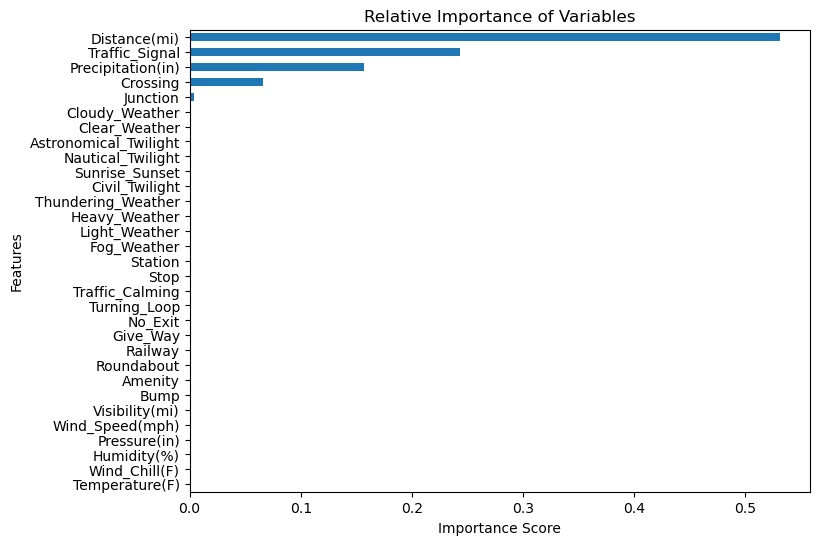

In [23]:
# Feature importance 

# Get feature importances
importances = pd.Series(dt_model.feature_importances_, index=X_train.columns)

# Plot
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Relative Importance of Variables")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## Linear Discriminant Analysis (LDA)

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("linear discriminant analysis ==>", f" MSE: {mse:.2f}", f"; MAE: {mae:.2f}", f"; MAPE: {mape * 100:.2f}%")
report = classification_report(y_test, y_pred)
print(report)

linear discriminant analysis ==>  MSE: 0.29 ; MAE: 0.23 ; MAPE: 7.92%
              precision    recall  f1-score   support

           1       0.06      0.00      0.00     13224
           2       0.80      1.00      0.89   1194481
           3       0.39      0.00      0.00    251719
           4       0.14      0.02      0.03     38979

    accuracy                           0.80   1498403
   macro avg       0.35      0.25      0.23   1498403
weighted avg       0.71      0.80      0.71   1498403



## Polynomial Regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


# Polynomial feature expansion
poly = PolynomialFeatures(degree=3)  # degree=3 for cubic terms
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("polynomial regression ==>", f" MSE: {mse:.2f}", f"; MAE: {mae:.2f}", f"; MAPE: {mape * 100:.2f}%")

polynomial regression ==>  MSE: 0.28 ; MAE: 0.23 ; MAPE: 7.80%
